In [36]:
%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd
import os
import re


In [33]:
## accuracy

mvcnn = (
	pd.concat([
		pd.read_csv('./results/mvcnn_stage_2/logs.csv')
			.assign(epoch=lambda x: x.epoch.astype(int) + 5),
		pd.read_csv('./results/mvcnn_stage_1/logs.csv')
	])
	.sort_values('epoch')
	[['epoch', 'train_acc', 'acc']]
)
mvcnn.columns = ['epoch', 'mvcnn', 'val_mvcnn']
# ----------------------------------------------------------------------------------------
original = (
	pd.read_csv('./results/capsnet/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
original.columns = ['epoch', 'capsnet', 'val_capsnet']
# ----------------------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/mv_capsnet/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
sv_capsnet.columns = ['epoch', 'mv_capsnet', 'val_mv_capsnet']
mv_capsnet = (
	pd.read_csv('./results/mv_capsnet/mv-log.csv')
	.assign(epoch=lambda x: x.epoch + 5)
	[['epoch', 'view_pooling_accuracy', 'val_view_pooling_accuracy']]
)
mv_capsnet.columns = ['epoch', 'mv_capsnet', 'val_mv_capsnet']
mv_capsnet = pd.concat([sv_capsnet, mv_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
mv_cap_capsnet1 = (
	pd.read_csv('./results/mv_cap_capsnet1v1/mv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
	.sort_values('epoch')
)
mv_cap_capsnet1.columns = ['epoch', 'mv_cap_capsnet1', 'val_mv_cap_capsnet1']
# ----------------------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/mv_cap_capsnet2/experiment/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
sv_capsnet.columns =['epoch', 'mv_cap_capsnet2', 'val_mv_cap_capsnet2']
mv_cap_capsnet = (
	pd.read_csv('./results/mv_cap_capsnet2/experiment/mv-log.csv')
	.assign(epoch=lambda x: x.epoch + 5)
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
mv_cap_capsnet.columns = ['epoch', 'mv_cap_capsnet2', 'val_mv_cap_capsnet2']
mv_cap_capsnet2 = pd.concat([sv_capsnet, mv_cap_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
metrics = (
	mvcnn
	.merge(original, on='epoch')
	.merge(mv_capsnet, on='epoch')
	.merge(mv_cap_capsnet1, on='epoch')
	.merge(mv_cap_capsnet2, on='epoch')
	.assign(epoch=lambda x: x.epoch.astype(int) + 1)
)

trained = metrics.filter(regex=r'^(?!val.*)|epoch')
validated = metrics.filter(regex=r'^(val.*|epoch)')


In [34]:

print(
	validated.to_latex(
		header=[
			'epocha', 'mvcnn', 'capsnet', 'mv-capsnet', 'mv-cap-capsnet1', 'mv-cap-capsnet2'
		],
		index=False,
		float_format='%.3f'
	).replace('.', ',')
)
print(
	trained.to_latex(
		header=[
			'epocha', 'mvcnn', 'capsnet', 'mv-capsnet', 'mv-cap-capsnet1', 'mv-cap-capsnet2'
		],
		index=False,
		float_format='%.3f'
	).replace('.', ',')
)


\begin{tabular}{rrrrrr}
\toprule
epocha & mvcnn & capsnet & mv-capsnet & mv-cap-capsnet1 & mv-cap-capsnet2 \\
\midrule
     1 & 0,792 &   0,302 &      0,718 &           0,692 &           0,480 \\
     2 & 0,835 &   0,562 &      0,768 &           0,789 &           0,629 \\
     3 & 0,849 &   0,631 &      0,778 &           0,822 &           0,687 \\
     4 & 0,858 &   0,663 &      0,784 &           0,828 &           0,714 \\
     5 & 0,860 &   0,683 &      0,800 &           0,850 &           0,721 \\
     6 & 0,888 &   0,674 &      0,800 &           0,861 &           0,832 \\
     7 & 0,880 &   0,698 &      0,822 &           0,864 &           0,848 \\
     8 & 0,881 &   0,701 &      0,827 &           0,862 &           0,838 \\
     9 & 0,896 &   0,723 &      0,808 &           0,861 &           0,841 \\
    10 & 0,901 &   0,710 &      0,853 &           0,856 &           0,828 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrrrrr}
\toprule
epocha & mvcnn & capsnet & mv-capsnet & mv-cap-caps

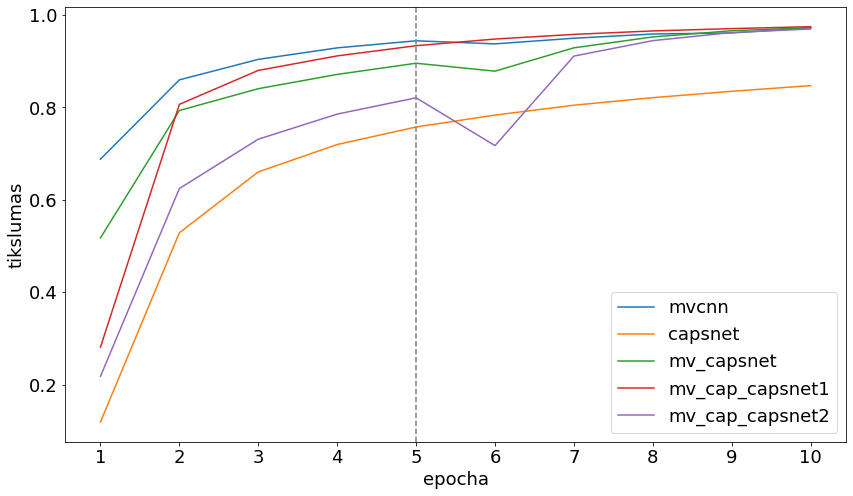

In [35]:
ax = trained.plot(x='epoch', y=trained.columns[1:], figsize=(14, 8), fontsize=18, xticks=trained['epoch'])
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('tikslumas', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=5, color='grey', linestyle='--')
plt.savefig('trained.png')

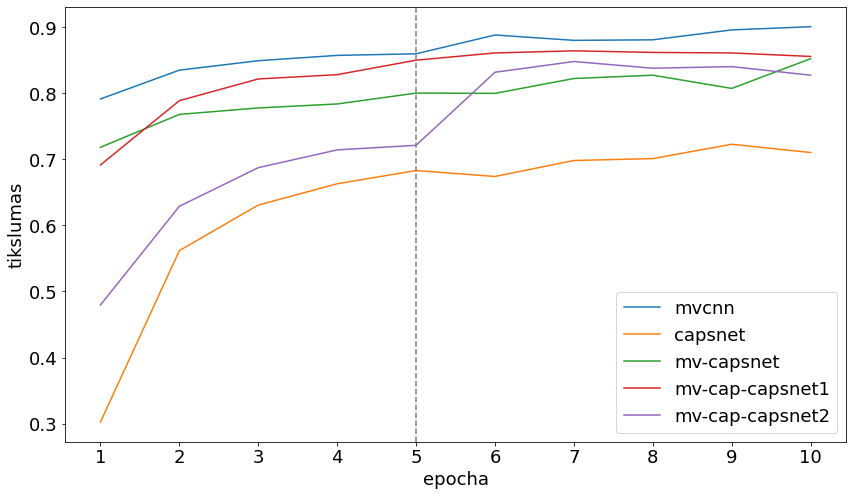

In [36]:
validated.columns = [
	'epoch', 'mvcnn', 'capsnet', 'mv-capsnet', 'mv-cap-capsnet1', 'mv-cap-capsnet2'
]
ax = validated.plot(x='epoch', y=validated.columns[1:], figsize=(14, 8), fontsize=18, xticks=validated['epoch'])
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('tikslumas', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=5, color='grey', linestyle='--')
plt.savefig('validated.png')

In [41]:
## accuracy smaller dataset

mvcnn = (
	pd.concat([
		pd.read_csv('./results/less_data/mvcnn_v1/mvcnn_stage_2/logs.csv')
			.assign(epoch=lambda x: x.epoch.astype(int) + 5),
		pd.read_csv('./results/less_data/mvcnn_v1/mvcnn_stage_1/logs.csv')
	])
	.sort_values('epoch')
	[['epoch', 'train_acc', 'acc']]
)
mvcnn.columns = ['epoch', 'mvcnn', 'val_mvcnn']

mv_cap_capsnet = (
	pd.read_csv('./results/less_data/capsnet_v1/mv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
	.sort_values('epoch')
)
mv_cap_capsnet.columns = ['epoch', 'mv_cap_capsnet', 'val_mv_cap_capsnet']
# ----------------------------------------------------------------------------------------
metrics = (
	mvcnn
	.merge(mv_cap_capsnet, on='epoch')
	.assign(epoch=lambda x: x.epoch.astype(int) + 1)
)


In [42]:

print(
	metrics.to_latex(
		header=[
			'epocha', 'mvcnn', 'val-mvcnn', 'mv-cap-capsnet', 'val-mv-cap-capsnet'
		],
		index=False,
		float_format='%.3f'
	).replace('.', ',')
)

\begin{tabular}{rrrrr}
\toprule
epocha & mvcnn & val-mvcnn & mv-cap-capsnet & val-mv-cap-capsnet \\
\midrule
     1 & 0,594 &     0,752 &          0,064 &              0,041 \\
     2 & 0,821 &     0,792 &          0,219 &              0,532 \\
     3 & 0,875 &     0,816 &          0,706 &              0,742 \\
     4 & 0,910 &     0,824 &          0,813 &              0,801 \\
     5 & 0,930 &     0,819 &          0,878 &              0,810 \\
     6 & 0,922 &     0,836 &          0,910 &              0,826 \\
     7 & 0,928 &     0,847 &          0,930 &              0,828 \\
     8 & 0,948 &     0,862 &          0,944 &              0,831 \\
     9 & 0,955 &     0,868 &          0,956 &              0,829 \\
    10 & 0,961 &     0,847 &          0,964 &              0,832 \\
\bottomrule
\end{tabular}



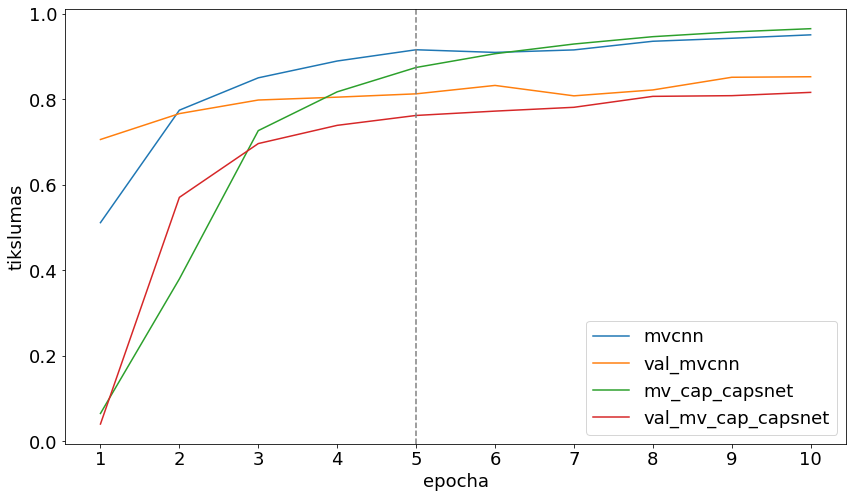

In [25]:
ax = metrics.plot(x='epoch', y=metrics.columns[1:], figsize=(14, 8), fontsize=18, xticks=metrics['epoch'])
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('tikslumas', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=5, color='grey', linestyle='--')
plt.savefig('less_data_v1.png')

In [11]:
## f1

mvcnn = (
	pd.concat([
		pd.read_csv('./results/f1/mvcnn_2_f1.csv')
			.assign(epoch=lambda x: x.epoch.astype(int) + 6),
		pd.read_csv('./results/f1/mvcnn_1_f1.csv')
	])
	.sort_values('epoch')
	[['epoch', 'f1_weighted', 'f1_micro', 'f1_macro']]
)
mvcnn.columns = ['epoch', 'mvcnn_weighted', 'mvcnn_micro', 'mvcnn_macro']
# capsnet original -----------------------------------------------------------------------
original = (
	pd.read_csv('./results/f1/capsnet_f1.csv')
	[['epoch', 'val_f1_weighted', 'val_f1_micro', 'val_f1_macro']]
)
original.columns = ['epoch', 'capsnet_weighted', 'capsnet_micro', 'capsnet_macro']
# mv capsnet -----------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/f1/mv_capsnet_2_sv_f1.csv')
	[['epoch', 'val_f1_weighted', 'val_f1_micro', 'val_f1_macro']]
)
sv_capsnet.columns = [
	'epoch', 'mv_capsnet_weighted', 'mv_capsnet_micro', 'mv_capsnet_macro'
]
mv_capsnet = (
	pd.read_csv('./results/f1/mv_capsnet_2_mv_f1.csv')
	.assign(epoch=lambda x: x.epoch + 6)
	[['epoch', 'val_f1_weighted', 'val_f1_micro', 'val_f1_macro']]
)
mv_capsnet.columns = [
	'epoch', 'mv_capsnet_weighted', 'mv_capsnet_micro', 'mv_capsnet_macro'
]
mv_capsnet = pd.concat([sv_capsnet, mv_capsnet]).sort_values('epoch')
# mv cap capsnet 1 -----------------------------------------------------------------------
mv_cap_capsnet1 = (
	pd.read_csv('./results/f1/mv_cap_capsnet_1_f1.csv')
	[['epoch', 'val_f1_weighted', 'val_f1_micro', 'val_f1_macro']]
	.sort_values('epoch')
)
mv_cap_capsnet1.columns = [
	'epoch', 'mv_cap_capsnet_1_weighted',
	'mv_cap_capsnet_1_micro', 'mv_cap_capsnet_1_macro'
]
# mv cap capsnet 2 -----------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/f1/mv_cap_capsnet_2_sv_f1.csv')
	[['epoch', 'val_f1_weighted', 'val_f1_micro', 'val_f1_macro']]
)
sv_capsnet.columns = [
	'epoch', 'mv_cap_capsnet_2_weighted',
	'mv_cap_capsnet_2_micro', 'mv_cap_capsnet_2_macro'
]
mv_cap_capsnet = (
	pd.read_csv('./results/f1/mv_cap_capsnet_2_mv_f1.csv')
	.assign(epoch=lambda x: x.epoch + 6)
	[['epoch', 'val_f1_weighted', 'val_f1_micro', 'val_f1_macro']]
)
mv_cap_capsnet.columns = [
	'epoch', 'mv_cap_capsnet_2_weighted',
	'mv_cap_capsnet_2_micro', 'mv_cap_capsnet_2_macro'
]
mv_cap_capsnet2 = pd.concat([sv_capsnet, mv_cap_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
metrics = (
	mvcnn
	.merge(original, on='epoch')
	.merge(mv_capsnet, on='epoch')
	.merge(mv_cap_capsnet1, on='epoch')
	.merge(mv_cap_capsnet2, on='epoch')
	.assign(epoch=lambda x: x.epoch.astype(int) + 1)
)

weighted = metrics.filter(regex=r'weighted|epoch')
weighted.columns = [column.replace('_weighted', '') for column in weighted.columns]
micro = metrics.filter(regex=r'micro|epoch')
micro.columns = [column.replace('_micro', '') for column in micro.columns]
macro = metrics.filter(regex=r'macro|epoch')
macro.columns = [column.replace('_macro', '') for column in macro.columns]

In [12]:
print(
	weighted.to_latex(
		header=[
			'epocha', 'mvcnn', 'capsnet', 'mv-capsnet', 'mv-cap-capsnet1', 'mv-cap-capsnet2'
		],
		index=False,
		float_format='%.3f'
	).replace('.', ',')
)

print(
	micro.to_latex(
		header=[
			'epocha', 'mvcnn', 'capsnet', 'mv-capsnet', 'mv-cap-capsnet1', 'mv-cap-capsnet2'
		],
		index=False,
		float_format='%.3f'
	).replace('.', ',')
)

print(
	macro.to_latex(
		header=[
			'epocha', 'mvcnn', 'capsnet', 'mv-capsnet', 'mv-cap-capsnet1', 'mv-cap-capsnet2'
		],
		index=False,
		float_format='%.3f'
	).replace('.', ',')
)


\begin{tabular}{rrrrrr}
\toprule
epocha & mvcnn & capsnet & mv-capsnet & mv-cap-capsnet1 & mv-cap-capsnet2 \\
\midrule
     1 & 0,803 &   0,600 &      0,620 &           0,003 &           0,662 \\
     2 & 0,834 &   0,740 &      0,757 &           0,756 &           0,764 \\
     3 & 0,847 &   0,781 &      0,784 &           0,808 &           0,793 \\
     4 & 0,855 &   0,794 &      0,805 &           0,827 &           0,807 \\
     5 & 0,859 &   0,800 &      0,813 &           0,835 &           0,810 \\
     6 & 0,858 &   0,810 &      0,814 &           0,841 &           0,814 \\
     7 & 0,875 &   0,822 &      0,813 &           0,846 &           0,855 \\
     8 & 0,888 &   0,826 &      0,806 &           0,846 &           0,871 \\
     9 & 0,873 &   0,823 &      0,811 &           0,853 &           0,860 \\
    10 & 0,897 &   0,824 &      0,824 &           0,853 &           0,861 \\
    11 & 0,897 &   0,827 &      0,818 &           0,854 &           0,880 \\
    12 & 0,903 &   0,834 &      0,

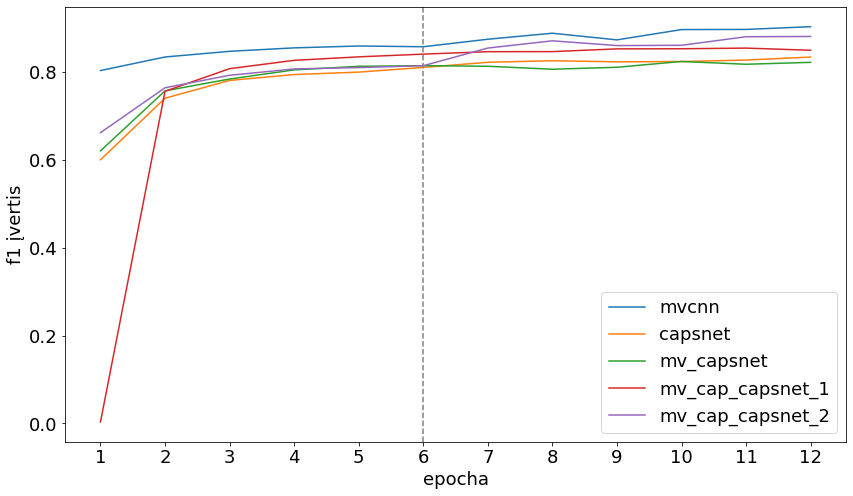

In [13]:
ax = weighted.plot(
	x='epoch', y=weighted.columns[1:], figsize=(14, 8), fontsize=18,
	xticks=weighted['epoch']
)
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('f1 įvertis', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=6, color='grey', linestyle='--')
plt.savefig('weighted.png')

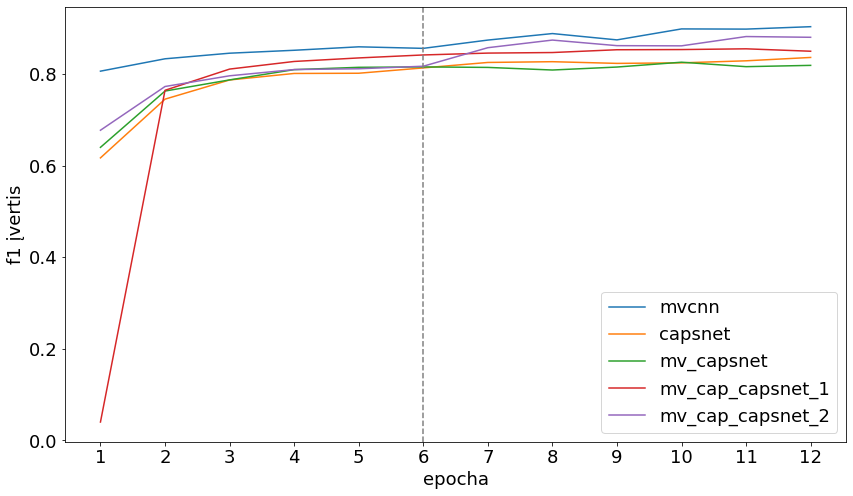

In [14]:
ax = micro.plot(
	x='epoch', y=micro.columns[1:], figsize=(14, 8), fontsize=18,
	xticks=micro['epoch']
)
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('f1 įvertis', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=6, color='grey', linestyle='--')
plt.savefig('micro.png')

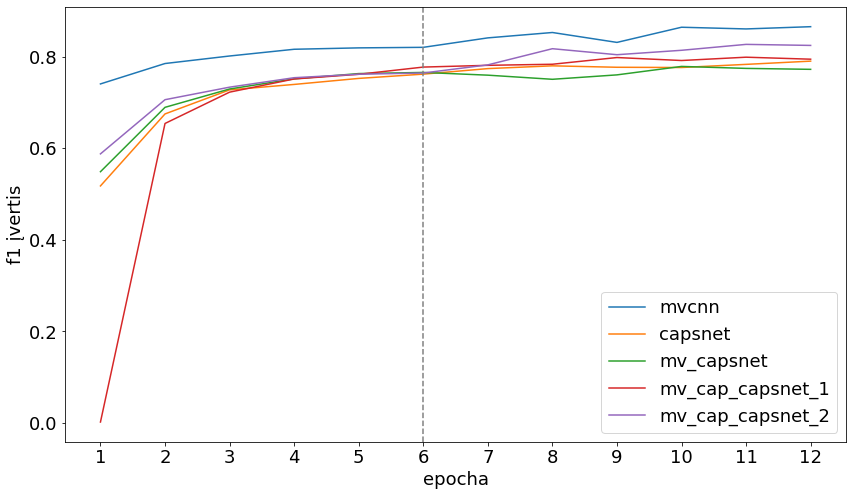

In [15]:
ax = macro.plot(
	x='epoch', y=macro.columns[1:], figsize=(14, 8), fontsize=18,
	xticks=micro['epoch']
)
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('f1 įvertis', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=6, color='grey', linestyle='--')
plt.savefig('macro.png')

In [6]:
## f1 smaller dataset

sample_share = 'half'
# sample_share = '3rd'

mvcnn = (
	pd.concat([
		pd.read_csv(f'./results/f1/mvcnn_{sample_share}_2_f1.csv')
		.assign(epoch=lambda x: x.epoch + 6),
		pd.read_csv(f'./results/f1/mvcnn_{sample_share}_1_f1.csv')
	])
	.sort_values('epoch')
	[['epoch', 'f1_weighted', 'f1_micro', 'f1_macro']]
)
mvcnn.columns = ['epoch', 'mvcnn_weighted', 'mvcnn_micro', 'mvcnn_macro']

mv_cap_capsnet = (
	pd.read_csv(f'./results/f1/{sample_share}_sample_f1.csv')
	[['epoch', 'val_f1_weighted', 'val_f1_micro', 'val_f1_macro']]
	.sort_values('epoch')
)
mv_cap_capsnet.columns = [
	'epoch', 'mv_cap_capsnet_1_weighted', 'mv_cap_capsnet_1_micro', 'mv_cap_capsnet_1_macro'
]
# ----------------------------------------------------------------------------------------
metrics = (
	mvcnn
	.merge(mv_cap_capsnet, on='epoch')
	.assign(epoch=lambda x: x.epoch.astype(int) + 1)
)


In [7]:

print(
	metrics.to_latex(
		header=[
			'epocha', 'mvcnn_weighted', 'mvcnn_micro', 'mvcnn_macro',
			'mv_cap_capsnet_1_weighted', 'mv_cap_capsnet_1_micro', 'mv_cap_capsnet_1_macro'
		],
		index=False,
		float_format='%.3f'
	).replace('.', ',')
)

\begin{tabular}{rrrrrrr}
\toprule
epocha & mvcnn\_weighted & mvcnn\_micro & mvcnn\_macro & mv\_cap\_capsnet\_1\_weighted & mv\_cap\_capsnet\_1\_micro & mv\_cap\_capsnet\_1\_macro \\
\midrule
     1 &          0,690 &       0,695 &       0,616 &                     0,003 &                  0,040 &                  0,002 \\
     2 &          0,775 &       0,778 &       0,711 &                     0,001 &                  0,013 &                  0,001 \\
     3 &          0,798 &       0,798 &       0,737 &                     0,602 &                  0,623 &                  0,496 \\
     4 &          0,797 &       0,795 &       0,745 &                     0,725 &                  0,732 &                  0,636 \\
     5 &          0,814 &       0,814 &       0,759 &                     0,767 &                  0,772 &                  0,691 \\
     6 &          0,813 &       0,814 &       0,755 &                     0,784 &                  0,787 &                  0,704 \\
     7 &   

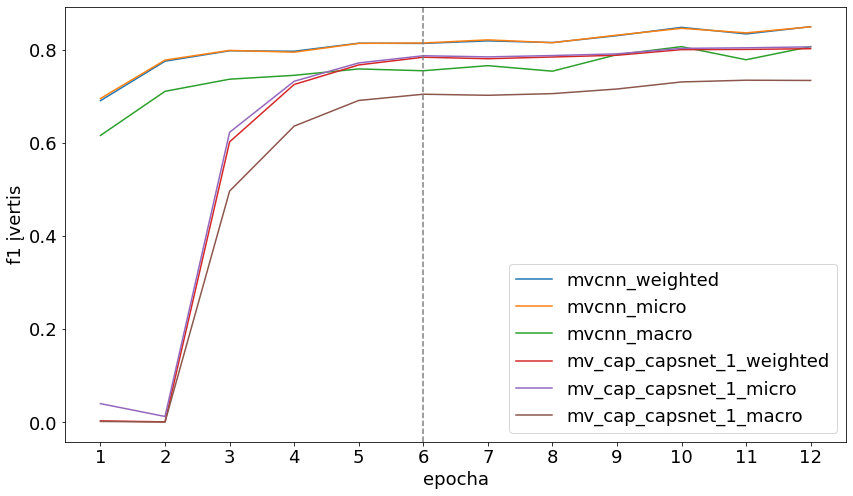

In [8]:
ax = metrics.plot(x='epoch', y=metrics.columns[1:], figsize=(14, 8), fontsize=18, xticks=metrics['epoch'])
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('f1 įvertis', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=6, color='grey', linestyle='--')
plt.savefig(f'{sample_share}_sample_f1.png')

In [109]:
directory = './results/quantitative_f1/'

COLUMNS = [
	('f1_weighted', 'f1_weighted'),
	('f1_micro', 'f1_micro'),
	('f1_macro', 'f1_macro')
]
FILE_TYPES = [
	('capsnet', r'^capsnet_all_v(\d+)\.csv$'),
	('mv_cap_capsnet_1', r'^mv_cap_capsnet_1_all_v(\d+)\.csv$'),
	('mv_cap_capsnet_2', r'^mv_cap_capsnet_2_all_v(\d+)_(?:sv|mv)\.csv$'),
	('mvcnn', r'^mvcnn_(?:1|2)_v(\d+)\.csv$'),
]

def extract_best_results(directory, file, columns=COLUMNS, file_types=FILE_TYPES):
	if 'mvcnn_' not in file:
		columns = [(column[0], 'val_' + column[1]) for column in columns]
	metrics = pd.read_csv(os.path.join(directory, file))
	result = {column[0]: metrics[column[1]].max() for column in columns}
	result['file_type'] = [file_type[0] for file_type in file_types if re.match(file_type[1], file)][0]
	result['version'] = [re.match(file_type[1], file)[1] for file_type in file_types if re.match(file_type[1], file)][0]
	return result


metrics = (
	pd.DataFrame([extract_best_results(directory, file) for file in os.listdir(directory)])
		.groupby(['file_type', 'version'])
		.max()
		.sort_values(['file_type', 'version'])
		.reset_index()
)


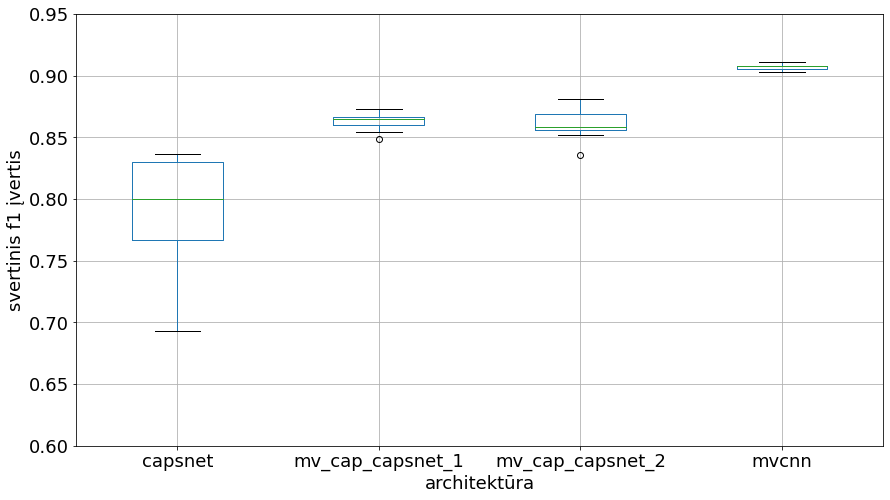

In [118]:

ax = metrics.drop(['f1_micro', 'f1_macro'], axis='columns').boxplot(by='file_type', figsize=(14, 8), fontsize=18)
ax.set_xlabel('architektūra', fontsize=18)
ax.set_ylabel('svertinis f1 įvertis', fontsize=18)
ax.set_ylim(0.6, 0.95)
ax.get_figure().suptitle('')
ax.set_title('')
plt.savefig(f'boxplot_f1_weighted.png')


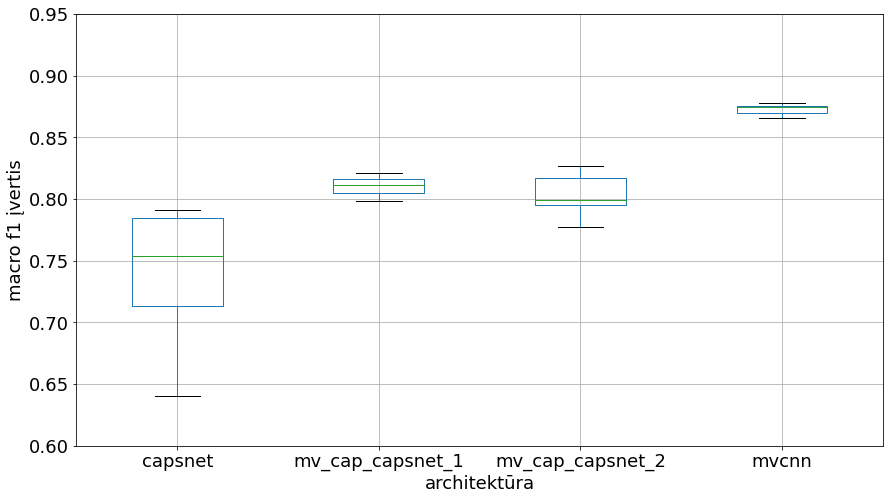

In [119]:

ax = metrics.drop(['f1_micro', 'f1_weighted'], axis='columns').boxplot(by='file_type', figsize=(14, 8), fontsize=18)
ax.set_xlabel('architektūra', fontsize=18)
ax.set_ylabel('macro f1 įvertis', fontsize=18)
ax.set_ylim(0.6, 0.95)
ax.get_figure().suptitle('')
ax.set_title('')
plt.savefig(f'boxplot_f1_macro.png')


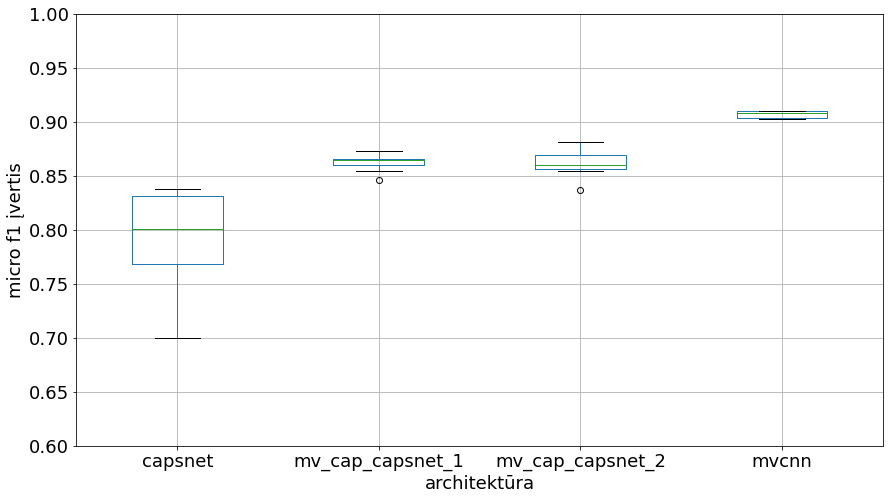

In [115]:

ax = metrics.drop(['f1_weighted', 'f1_macro'], axis='columns').boxplot(by='file_type', figsize=(14, 8), fontsize=18)
ax.set_xlabel('architektūra', fontsize=18)
ax.set_ylabel('micro f1 įvertis', fontsize=18)
ax.set_ylim(0.6, 0.95)
ax.get_figure().suptitle('')
ax.set_title('')
plt.savefig(f'boxplot_f1_micro.png')
